# 1-D Exploratory Data Analysis

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load the data

In [9]:
%%R -o df
 
# Import data with R
df <- read_csv('nyc_census_tobacco.csv', show_col_types = FALSE)
df %>% head(4)

# A tibble: 4 × 8
    GEOID NAME  geometry med_inc_estimate med_inc_moe census_tract counts COUNTY
    <dbl> <chr> <chr>               <dbl>       <dbl>        <dbl>  <dbl> <chr> 
1 3.61e10 Cens… list(li…            71815       18034  36081014700      7 Queens
2 3.60e10 Cens… list(li…            67315       10294  36047058400      2 Kings 
3 3.60e10 Cens… list(li…           107410       37032  36047055700      2 Kings 
4 3.60e10 Cens… list(li…            37200       15878  36005022101      2 Bronx 


In [10]:
%%R

#cast GEOID and census_track as a string
df <- df %>% 
  mutate(GEOID = as.character(GEOID),
         census_tract = as.character(census_tract))

head(df)

# A tibble: 6 × 8
  GEOID   NAME  geometry med_inc_estimate med_inc_moe census_tract counts COUNTY
  <chr>   <chr> <chr>               <dbl>       <dbl> <chr>         <dbl> <chr> 
1 360810… Cens… list(li…            71815       18034 36081014700       7 Queens
2 360470… Cens… list(li…            67315       10294 36047058400       2 Kings 
3 360470… Cens… list(li…           107410       37032 36047055700       2 Kings 
4 360050… Cens… list(li…            37200       15878 36005022101       2 Bronx 
5 360810… Cens… list(li…            50000       36794 36081047000       1 Queens
6 360470… Cens… list(li…           134602       71643 36047050402       5 Kings 


## Summary statistics

Pick a column or set of columns and calculate some summary statistics (like mean,median,min,max,sd).
Hint, you may want to use `group_by` and `summarize`.



In [ ]:
%%R 

# code for summary statistics

In [ ]:
# %%R

# discrete_variables <- c('vs', 'am', 'gear', 'carb')
# # 👉 Select the discrete variables only and make a pivot table for each
# # so we know how many cars there are in each category (for example, how many automatic vs manual)?

# mtcars %>% 
#     select(discrete_variables) %>%
#     pivot_longer(discrete_variables, names_to = "variable", values_to = "value") %>% 
#     group_by(variable, value) %>% 
#     summarize(
#         count = n()
#     )

## 1-D visualizations (aka distributions)


### Continus variables

For each continuous variable you are interested in, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. The chart can also show the mean or median of the variable for reference (for example for a histogram you can add a vertical line through the median).

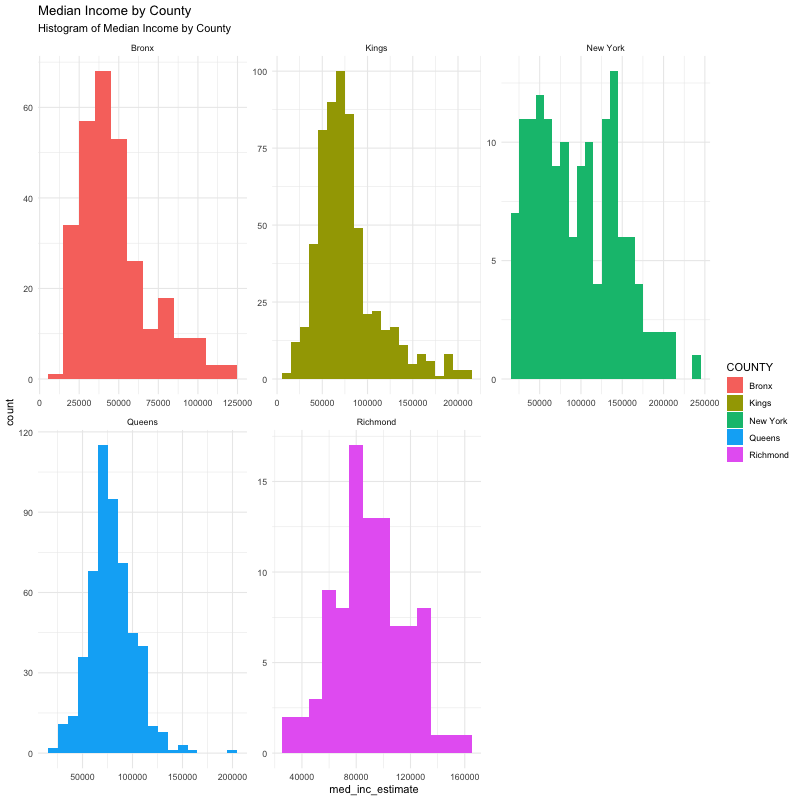

In [14]:
%%R -w 800 -h 800

# code for plot 1
# make sure to make a meaningful title and subtitle

#plot median income facet wrap by county
df %>% 
  ggplot(aes(x = med_inc_estimate, fill = COUNTY)) +
  geom_histogram(binwidth = 10000) +
  facet_wrap(~COUNTY, scales = 'free') +
  labs(title = 'Median Income by County', 
       subtitle = 'Histogram of Median Income by County') +
  theme_minimal()

In [27]:
%%R



# A tibble: 5 × 2
  COUNTY   count
  <chr>    <dbl>
1 Bronx     1170
2 Kings     2030
3 New York   289
4 Queens    1518
5 Richmond   329


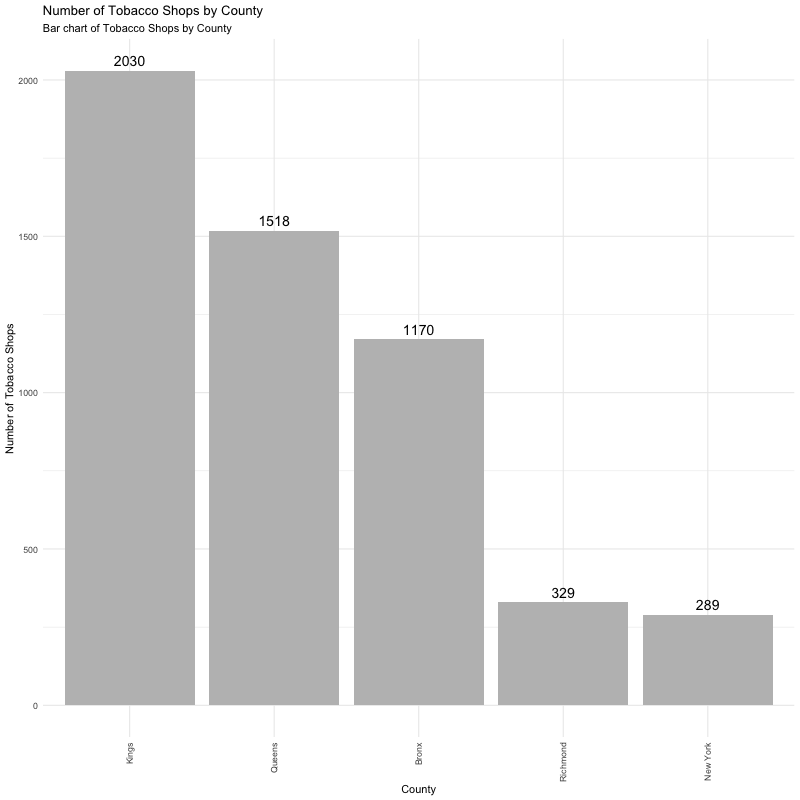

In [33]:
%%R -w 800 -h 800
# code for plot 2
# make sure to make a meaningful title and subtitle

#group the df by COUNTY and sum the counts column accordingly
shop_counts <- df %>% 
  group_by(COUNTY) %>% 
  summarize(count = sum(counts))

#plot a bar chart of shop counts and sho the count as a label
shop_counts %>% 
  ggplot(aes(x = reorder(COUNTY, -count), y = count)) +
  geom_bar(stat = 'identity', fill = 'gray') +
  geom_text(aes(label = count), vjust = -0.5, size = 5) +
  labs(title = 'Number of Tobacco Shops by County', 
       subtitle = 'Bar chart of Tobacco Shops by County') +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
    xlab('County') +
    ylab('Number of Tobacco Shops')



In [ ]:
# code for plot 3
# make sure to make a meaningful title and subtitle

### Discrete Variables

If there are any discrete variables you'd like to analyze, you can do that with charts here.

In [ ]:
# code for plot 1
# make sure to make a meaningful title and subtitle

In [ ]:
# code for plot 2
# make sure to make a meaningful title and subtitle

In [ ]:
# code for plot 3
# make sure to make a meaningful title and subtitle